In [1]:
import re
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
reviews_1 = pd.read_csv('reviews_1.csv')
reviews_2 = pd.read_csv('reviews_2.csv')

In [3]:
# Define a function to perform sentiment analysis using TextBlob
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

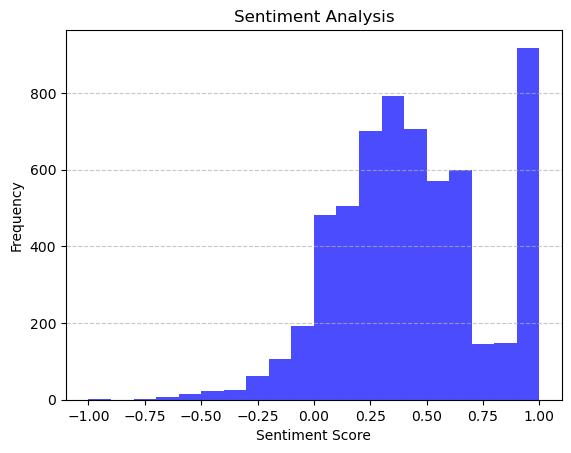

In [4]:
# Apply sentiment analysis to each review
sentiment_scores_1 = reviews_1['Review'].apply(analyze_sentiment)
# Plotting
plt.hist(sentiment_scores_1, bins=20, color='blue', alpha=0.7)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

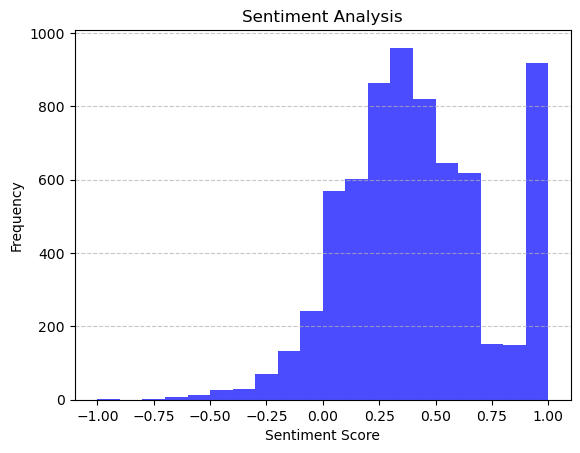

In [5]:
sentiment_scores_2 = reviews_2['Review'].apply(analyze_sentiment)
# Plotting
plt.hist(sentiment_scores_2, bins=20, color='blue', alpha=0.7)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [6]:
# Create a new DataFrame for scores
df_scores_1 = pd.DataFrame({'Sentiment Score': sentiment_scores_1})
df_scores_2 = pd.DataFrame({'Sentiment Score': sentiment_scores_2})

# Separate positive and negative scores
df_scores_1['Positive Score'] = df_scores_1['Sentiment Score'].apply(lambda x: x if x > 0 else np.nan)
df_scores_1['Negative Score'] = df_scores_1['Sentiment Score'].apply(lambda x: x if x < 0 else np.nan)
df_scores_2['Positive Score'] = df_scores_2['Sentiment Score'].apply(lambda x: x if x > 0 else np.nan)
df_scores_2['Negative Score'] = df_scores_2['Sentiment Score'].apply(lambda x: x if x < 0 else np.nan)

C:\Users\nevea\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nevea\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


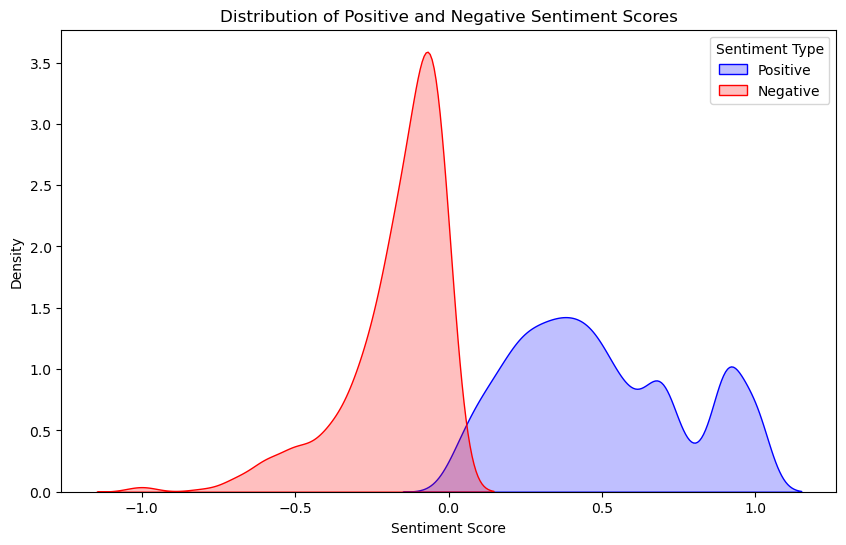

In [7]:
plt.figure(figsize=(10, 6))

# Plot KDE for positive scores
sns.kdeplot(df_scores_1['Positive Score'].dropna(), color="blue", fill=True, label='Positive')

# Plot KDE for negative scores
sns.kdeplot(df_scores_1['Negative Score'].dropna(), color="red", fill=True, label='Negative')

# Enhance the plot with labels and a legend
plt.title('Distribution of Positive and Negative Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.legend(title='Sentiment Type')

plt.show()


C:\Users\nevea\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nevea\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


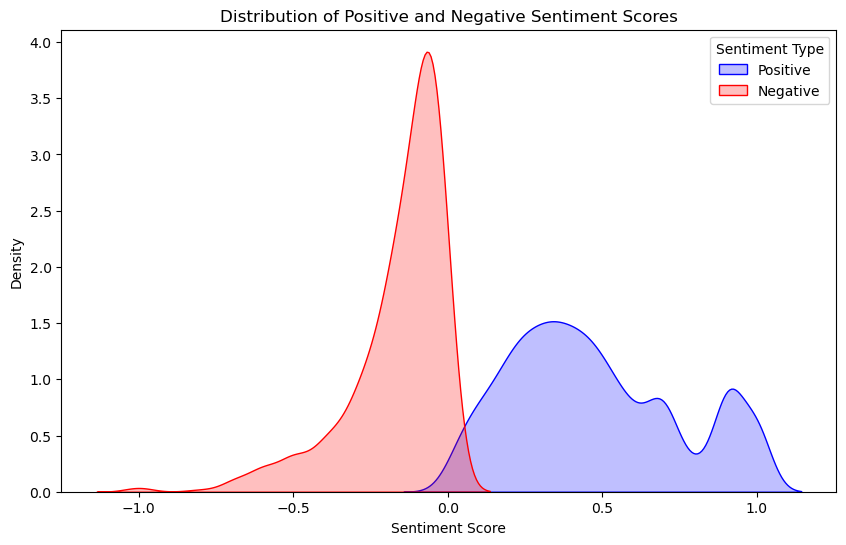

In [8]:
plt.figure(figsize=(10, 6))

# Plot KDE for positive scores
sns.kdeplot(df_scores_2['Positive Score'].dropna(), color="blue", fill=True, label='Positive')

# Plot KDE for negative scores
sns.kdeplot(df_scores_2['Negative Score'].dropna(), color="red", fill=True, label='Negative')

# Enhance the plot with labels and a legend
plt.title('Distribution of Positive and Negative Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.legend(title='Sentiment Type')

plt.show()


In [9]:
# Define a function to perform sentiment analysis using TextBlob
def classification_sentiment(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    if sentiment_score > 0.2:
        return 'Positive'
    elif sentiment_score < 0:
        return 'Negative'
    else:
        return 'Neutral'

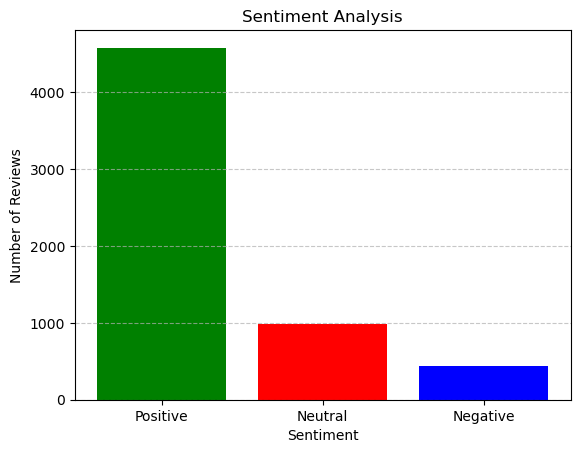

In [10]:
# Apply sentiment analysis to each review
sentiment_labels_1 = reviews_1['Review'].apply(classification_sentiment)

# Count the number of reviews in each sentiment category
sentiment_counts_1 = sentiment_labels_1.value_counts()

# Plotting
plt.bar(sentiment_counts_1.index, sentiment_counts_1.values, color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Analysis')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


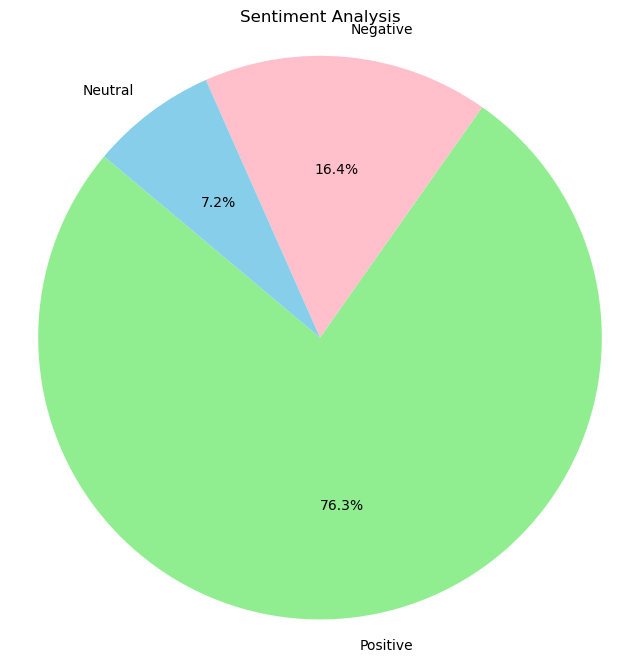

In [11]:
# sentiment counts for reviews_1
a = {'Positive': 4581, 'Negative': 984, 'Neutral': 435}

# Extract data for plotting
labels = a.keys()
sizes = a.values()
colors = ['lightgreen', 'pink', 'skyblue']  # Colors corresponding to sentiments

# Plotting the pie chart
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio 
plt.title('Sentiment Analysis')
plt.show()


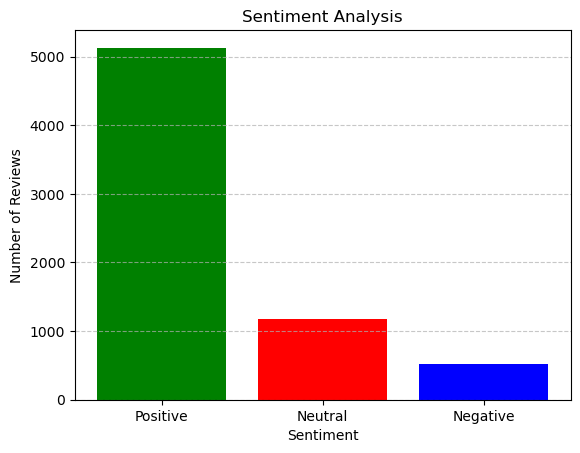

In [12]:
# Apply sentiment analysis to each review
sentiment_labels_2 = reviews_2['Review'].apply(classification_sentiment)

# Count the number of reviews in each sentiment category
sentiment_counts_2 = sentiment_labels_2.value_counts()

# Plotting
plt.bar(sentiment_counts_2.index, sentiment_counts_2.values, color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Analysis')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


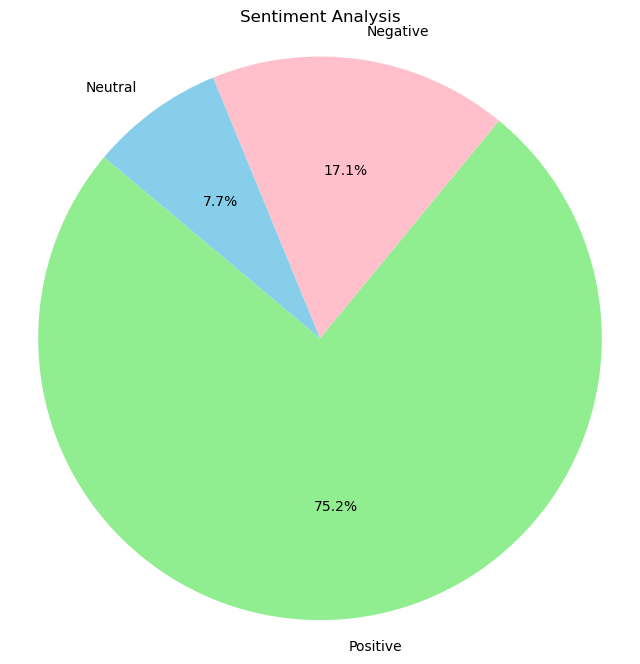

In [13]:
# sentiment counts for reviews_2
b = {'Positive': 5128, 'Negative': 1170, 'Neutral': 525}

# Extract data for plotting
labels = b.keys()
sizes = b.values()
colors = ['lightgreen', 'pink', 'skyblue']  # Colors corresponding to sentiments

# Plotting the pie chart
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio
plt.title('Sentiment Analysis')
plt.show()
